# Analysis around the lower Sesan 2 dam

This exercise is centered around the lower Sesan 2 dam in Cambodia. The entirety of the problem can and should be solved using remote sensing data, although other data sources can be used to complement or validate your results. 

## Load and display some data to contextualize

In [1]:
from odc.stac import stac_load
import pystac_client
import planetary_computer
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
xmin, ymin = 106.21281,13.32453
xmax, ymax = 106.52343,13.74590 

bounds = (xmin, ymin, xmax, ymax)

# small hack to filter out some images 
bounds_search = (xmin, ymin, xmax, (ymax + ymin)/2) 

In [14]:
# in landsat, tier 1 images are best quality, and tier 2 may not meet certain quality targets (e.g. positional accuracy)
tier = 'T1' 

time_range = '2015-01-01/2023-01-01'

collection_name = 'landsat-c2-l2'
catalog = pystac_client.Client.open('https://planetarycomputer.microsoft.com/api/stac/v1', 
                                    modifier=planetary_computer.sign_inplace,)

# we want to get landsat 8 data that is tier 1
query = {'platform': {'eq': 'landsat-8'},
         'landsat:collection_category': {'eq': tier},
         'eo:cloud_cover': {'lt':20}}

# return an item collection from the parameters above
collection = catalog.search(collections=[collection_name], 
                                     bbox=bounds_search, 
                                     datetime=time_range, 
                                     query=query, 
                                     # sortby=sortby
                           ).item_collection()

#collection

In [4]:
ds = stac_load(collection, bbox=bounds, chunks={}, )
ds

<xarray.Dataset> Size: 3GB
Dimensions:      (y: 1560, x: 1131, time: 53)
Coordinates:
  * y            (y) float64 12kB 1.52e+06 1.52e+06 ... 1.473e+06 1.473e+06
  * x            (x) float64 9kB 6.311e+05 6.311e+05 ... 6.65e+05 6.65e+05
    spatial_ref  int32 4B 32648
  * time         (time) datetime64[ns] 424B 2015-01-08T03:13:29.982468 ... 20...
Data variables: (12/19)
    qa           (time, y, x) int16 187MB dask.array<chunksize=(1, 1560, 1131), meta=np.ndarray>
    red          (time, y, x) uint16 187MB dask.array<chunksize=(1, 1560, 1131), meta=np.ndarray>
    blue         (time, y, x) uint16 187MB dask.array<chunksize=(1, 1560, 1131), meta=np.ndarray>
    drad         (time, y, x) int16 187MB dask.array<chunksize=(1, 1560, 1131), meta=np.ndarray>
    emis         (time, y, x) int16 187MB dask.array<chunksize=(1, 1560, 1131), meta=np.ndarray>
    emsd         (time, y, x) int16 187MB dask.array<chunksize=(1, 1560, 1131), meta=np.ndarray>
    ...           ...
    swir16       (time, y, x) uint16 187MB dask.array<chunksize=(1, 1560, 1131), meta=np.ndarray>
    swir22       (time, y, x) uint16 187MB dask.array<chunksize=(1, 1560, 1131), meta=np.ndarray>
    coastal      (time, y, x) uint16 187MB dask.array<chunksize=(1, 1560, 1131), meta=np.ndarray>
    qa_pixel     (time, y, x) uint16 187MB dask.array<chunksize=(1, 1560, 1131), meta=np.ndarray>
    qa_radsat    (time, y, x) uint16 187MB dask.array<chunksize=(1, 1560, 1131), meta=np.ndarray>
    qa_aerosol   (time, y, x) uint8 94MB dask.array<chunksize=(1, 1560, 1131), meta=np.ndarray>

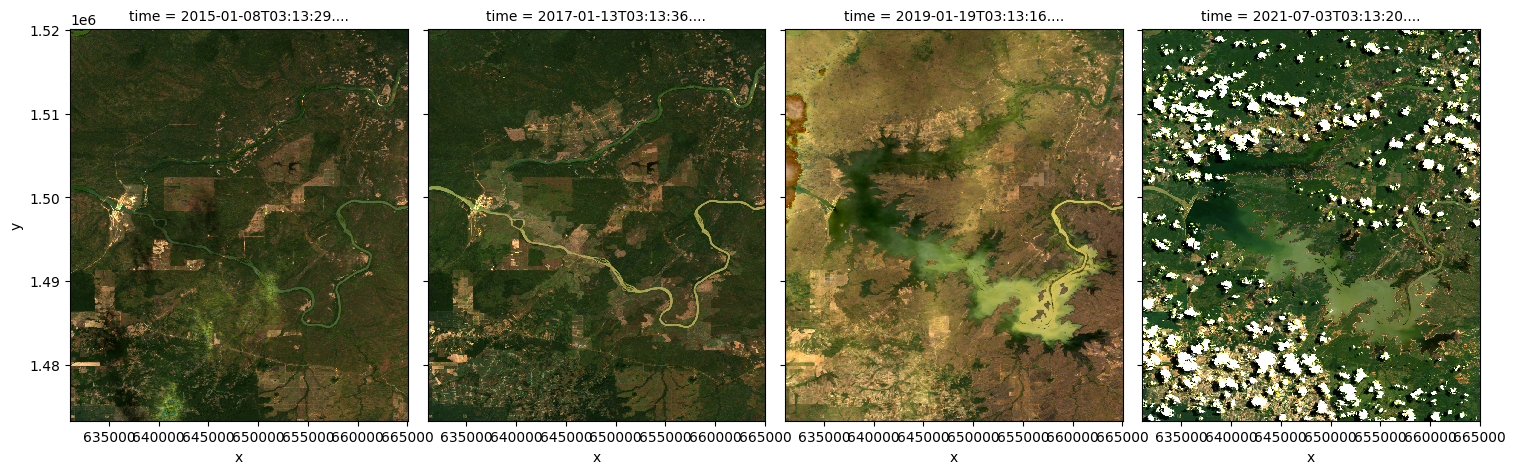

In [5]:
# plot RGB images every 15 observations
rgbs = ds[['red','green','blue']].sel(time=slice(None, None, 15)).to_dataarray()
_ = rgbs.plot.imshow(vmin=7500, vmax=14500, col='time', figsize=(15,5))

As you can see in the data above, we have a data cube (xarray Dataset) of 1560 x 1131 pixels and 53 observations in time.

In [6]:
aspect = len(ds.x) / len(ds.y) # figure out the aspect ratio so the plots don't get distorted
# persist the images to memory
before = ds.isel(time=1).persist()
after  = ds.isel(time=-5).persist()

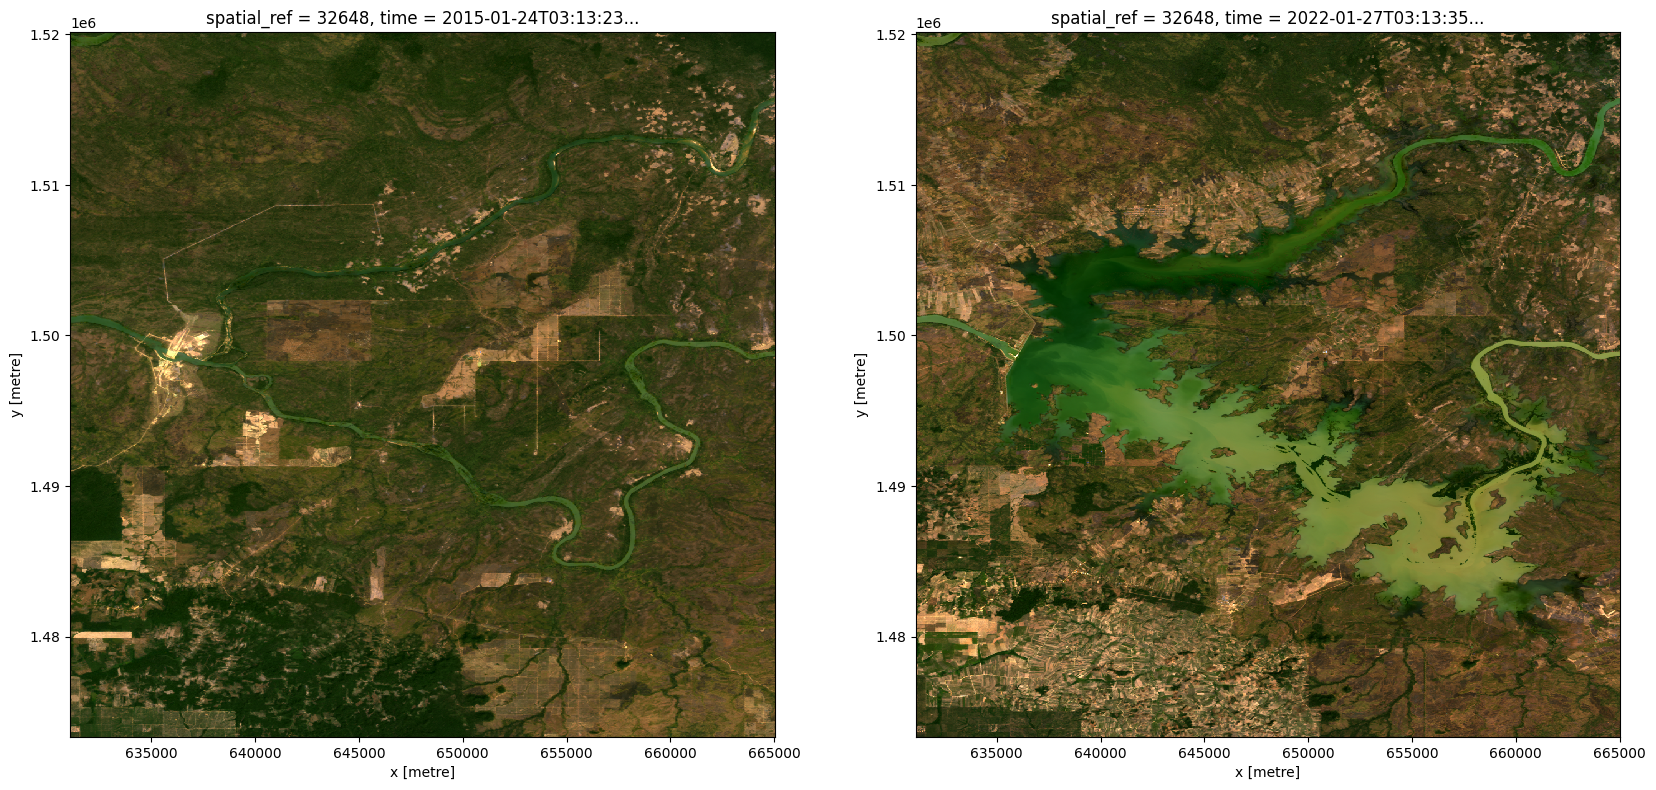

In [7]:
fig, ax = plt.subplots(1,2, figsize=(20,10))
before[['red','green','blue']].to_dataarray().plot.imshow(vmin=7777, vmax=14000, ax=ax[0])
ax[0].set_aspect(aspect)
after[['red','green','blue']].to_dataarray().plot.imshow(vmin=7777, vmax=14000, ax=ax[1])
ax[1].set_aspect(aspect)

The plot above shows two images (`before` and `after`) that are appropriate to solve the problem.

## Questions

1. When did the dam become operational?
2. How much area was flooded by the dam between the `before` and `after` scenes?
3. Estimate the volume of water the dam is holding in the `after` scene.

### Preparation

We recommend you scale the landsat reflectance and temperature band (`lwir11`) as described in the [documentation](https://www.usgs.gov/faqs/how-do-i-use-a-scale-factor-landsat-level-2-science-products):

$$
R = 0.0000275 \cdot (DN) - 0.2 \\
T = 0.00341802 \cdot (DN) + 149
$$

To convert the digital number values of the band ($DN$) to reflectance ($R$) or temperature ($T$).

### When did the dam become operational?

In [8]:
# < your code here, add as many code and markdown cells as you need, detailing and explaining the process.

### How much area was flooded by the dam between the `before` and `after` scenes?

In [9]:
# < your code here, add as many code and markdown cells as you need, detailing and explaining the process.

### Estimate the capacity of the dam.

In [10]:
# < your code here, add as many code and markdown cells as you need, detailing and explaining the process.

### Aditional question

to be discussed during the last part of the interview

In [11]:
ds['temperature_C'] = ds.lwir11 * 0.00341802 + 149 - 273.15

In [12]:
img = ds.sel(time='2021-12-10').squeeze('time')

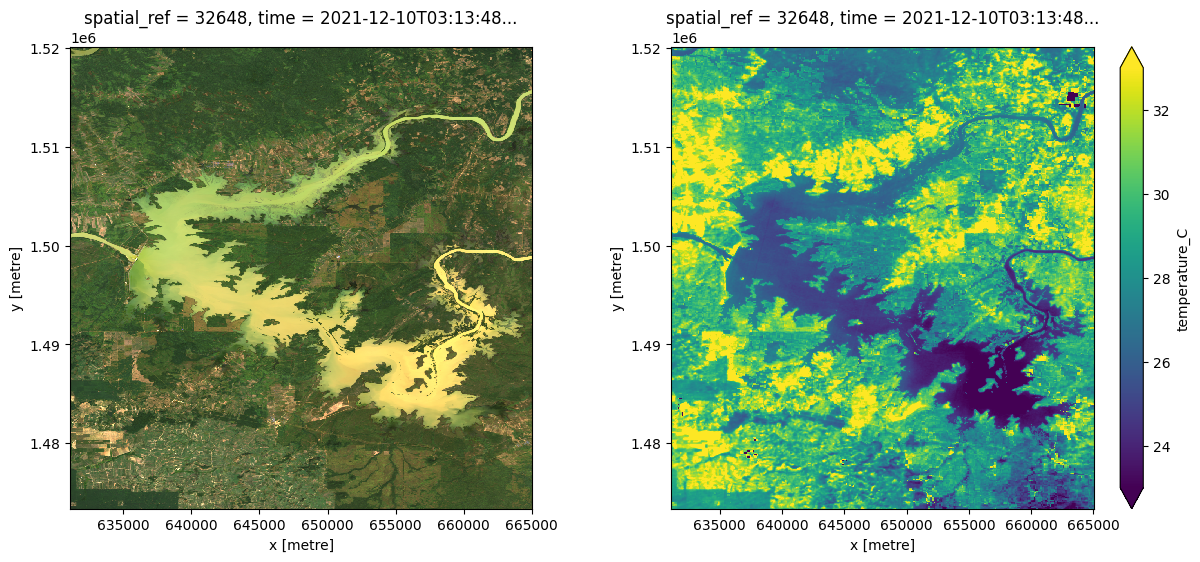

In [13]:
fig, ax = plt.subplots(1,2, figsize=(15, 6))
img[['red','green','blue']].to_dataarray().plot.imshow(vmin=7000, vmax=13000, ax=ax[0])
ax[0].set_aspect(aspect)
img['temperature_C'].plot.imshow(vmin=23, vmax=33, ax=ax[1])